# Module 1 - Manipulating data with Pandas
## Pandas Part 2

![austin](http://www.austintexas.gov/sites/default/files/aac_logo.jpg)

## Scenario:
You have decided that you want to start your own animal shelter, but you want to get an idea of what that will entail and get more information about planning. In this lecture, we are continue to look at a real data set collected by Austin Animal Center over several years and use our pandas skills from the last lecture and learn some new ones in order to explore this data further.

#### _Our goals today are to be able to_: <br/>

Use the pandas library to:

- Get summary info about a dataset and its variables
  - Apply and use info, describe and dtypes
  - Use mean, min, max, and value_counts 
- Use apply and applymap to transform columns and create new values

- Explain lambda functions and use them to use an apply on a DataFrame
- Explain what a groupby object is and split a DataFrame using a groupby
- Reshape a DataFrame using joins, merges, pivoting, stacking, and melting


### (From end of last week's lesson) Boolean Subsetting

In [1]:
import pandas as pd

student_dict = {
    'name': ['Samantha', 'Alex', 'Dante', 'Samantha'],
    'age': ['35', '17', '26', '21'],
    'city': ['Houston', 'Seattle', 'New york', 'Atlanta'],
    'state': ['Texas', 'Washington', 'New York', 'Georgia']
}

students_df = pd.DataFrame(student_dict)

In [3]:
students_df['name'] == 'Samantha'

0     True
1    False
2    False
3     True
Name: name, dtype: bool

In [2]:
# The statement data[‘name’] == ‘Samantha’] produces a Pandas Series with a True/False value for every row
# in the ‘data’ DataFrame, where there are “True” values for the rows where the name is “Samantha”.
# These type of boolean arrays can be passed directly to the .loc indexer.
students_df.loc[students_df['name'] == 'Samantha']

,name,age,city,state
0,Samantha,35,Houston,Texas
3,Samantha,21,Atlanta,Georgia


In [4]:
# What about if we only want the city and state of the selected students with the name Samantha?
students_df.loc[students_df['name'] == 'Samantha', ['city', 'state']]

,city,state
0,Houston,Texas
3,Atlanta,Georgia


In [5]:
# What amount if we want to select a student of a specific age?
students_df.loc[students_df['age'] == '21']

,name,age,city,state
3,Samantha,21,Atlanta,Georgia


In [6]:
students_df['age'] == '21'

0    False
1    False
2    False
3     True
Name: age, dtype: bool

In [7]:
students_df['city'] == 'Atlanta'

0    False
1    False
2    False
3     True
Name: city, dtype: bool

In [17]:
# What amount if we want to select a student of a specific age?
students_df.iloc[(students_df['age'] == '21') &
                (students_df['city'] == 'Atlanta')]

NotImplementedError: iLocation based boolean indexing on an integer type is not available

In [26]:
# What should be returned?
students_df.loc[(students_df['age'] == '35') |
                (students_df['city'] == 'Atlanta')]

,name,age,city,state
0,Samantha,35,Houston,Texas
3,Samantha,21,Atlanta,Georgia


## Getting started

Let's take a moment to examine the [Austin Animal Center data set](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238/data). What kinds of questions can we ask this data and what kinds of information can we get back?

In pairs and as a class, let's generate ideas.

## Switch gears

Before we answer those questions about the animal shelter data, let's practice on a simpler dataset.
Read about this dataset here: https://www.kaggle.com/ronitf/heart-disease-uci
![heart-data](images/heartbloodpres.jpeg)

The dataset is most often used to practice classification algorithms. Can one develop a model to predict the likelihood of heart disease based on other measurable characteristics? We will return to that specific question in a few weeks, but for now we wish to use the dataset to practice some pandas methods.

### 1. Get summary info about a dataset and its variables

Applying and using `info`, `describe`, `mean`, `min`, `max`, `apply`, and `applymap` from the Pandas library

The Pandas library has several useful tools built in. Let's explore some of them.

In [28]:
!pwd
!ls data -lath

/Users/enkeboll/code/fis/dc-ds-08-26-19/module-1/week-2/day-1-pandas-2
ls: -lath: No such file or directory
data:
ds_chars.csv heart.csv    states.csv


In [29]:
import pandas as pd
import numpy as np

uci = pd.read_csv('data/heart.csv')

In [30]:
uci.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### The `.columns` and `.shape` Attributes

In [31]:
uci.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [32]:
uci.shape

(303, 14)

In [33]:
uci.size

4242

#### The `.info() `and `.describe()` and `.dtypes` methods

Pandas DataFrames have many useful methods! Let's look at `.info()` , `.describe()`, and `dtypes`.

In [34]:
# Call the .info() method on our dataset. What do you observe?
uci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [36]:
None == None

True

In [37]:
None is None

True

In [43]:
np.NaN == np.NaN

False

In [44]:
uci_new = uci.copy()
uci_new['str_col'] = 'B'

In [46]:
uci.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [45]:
uci_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,str_col
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,B
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,B
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,B
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,B
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,B


In [49]:
# Call the .describe() method on our dataset. What do you observe?
uci_new.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [52]:
# Use the code below. How does the output differ from info() ?
uci_new.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
str_col      object
dtype: object

#### `.mean()`, .`min()`,` .max()`, `.sum()`

The methods `.mean()`, `.min()`, and `.max()` will perform just the way you think they will!

Note that these are methods both for Series and for DataFrames.

Also check out `.count()` and  `.isna()`.

In [60]:
uci_new.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
str_col     303
dtype: int64

In [66]:
pd.isnull(uci)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [67]:
uci.ca.isnull()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
273    False
274    False
275    False
276    False
277    False
278    False
279    False
280    False
281    False
282    False
283    False
284    False
285    False
286    False
287    False
288    False
289    False
290    False
291    False
292    False
293    False
294    False
295    False
296    False
297    False
298    False
299    False
300    False
301    False
302    False
Name: ca, Length: 303, dtype: bool

#### The Axis Variable

In [71]:
uci.sum(axis=1)  # Try [shift] + [tab] here!

0      600.3
1      614.5
2      554.4
3      598.8
4      701.6
5      542.4
6      649.3
7      609.0
8      596.5
9      559.6
10     601.2
11     600.2
12     624.6
13     539.8
14     663.0
15     555.6
16     698.0
17     565.6
18     619.5
19     611.8
20     596.5
21     596.4
22     593.0
23     602.0
24     570.4
25     704.4
26     589.6
27     468.6
28     788.8
29     540.2
       ...  
273    556.1
274    557.0
275    567.0
276    536.0
277    591.3
278    673.0
279    499.6
280    624.8
281    546.0
282    547.2
283    603.0
284    555.9
285    627.8
286    570.8
287    614.0
288    656.0
289    528.0
290    581.0
291    641.4
292    607.8
293    588.8
294    483.8
295    547.0
296    525.0
297    496.0
298    567.2
299    561.2
300    558.4
301    442.2
302    602.0
Length: 303, dtype: float64

#### .`value_counts()`

For a DataFrame _Series_, the `.value_counts()` method will tell you how many of each value you've got.

In [72]:
uci.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

Exercise: What are the different values for `restecg`?

In [76]:
# Your code here!
print(uci.restecg.unique())
print(uci.restecg.value_counts())

[0 1 2]
1    152
0    147
2      4
Name: restecg, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115fb3ba8>,
      dtype=object)

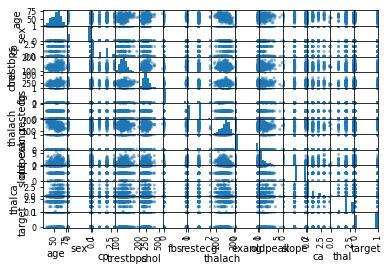

In [80]:
%matplotlib inline
pd.plotting.scatter_matrix(uci)

In [82]:
import pandas_profiling

ModuleNotFoundError: No module named 'pandas_profiling'

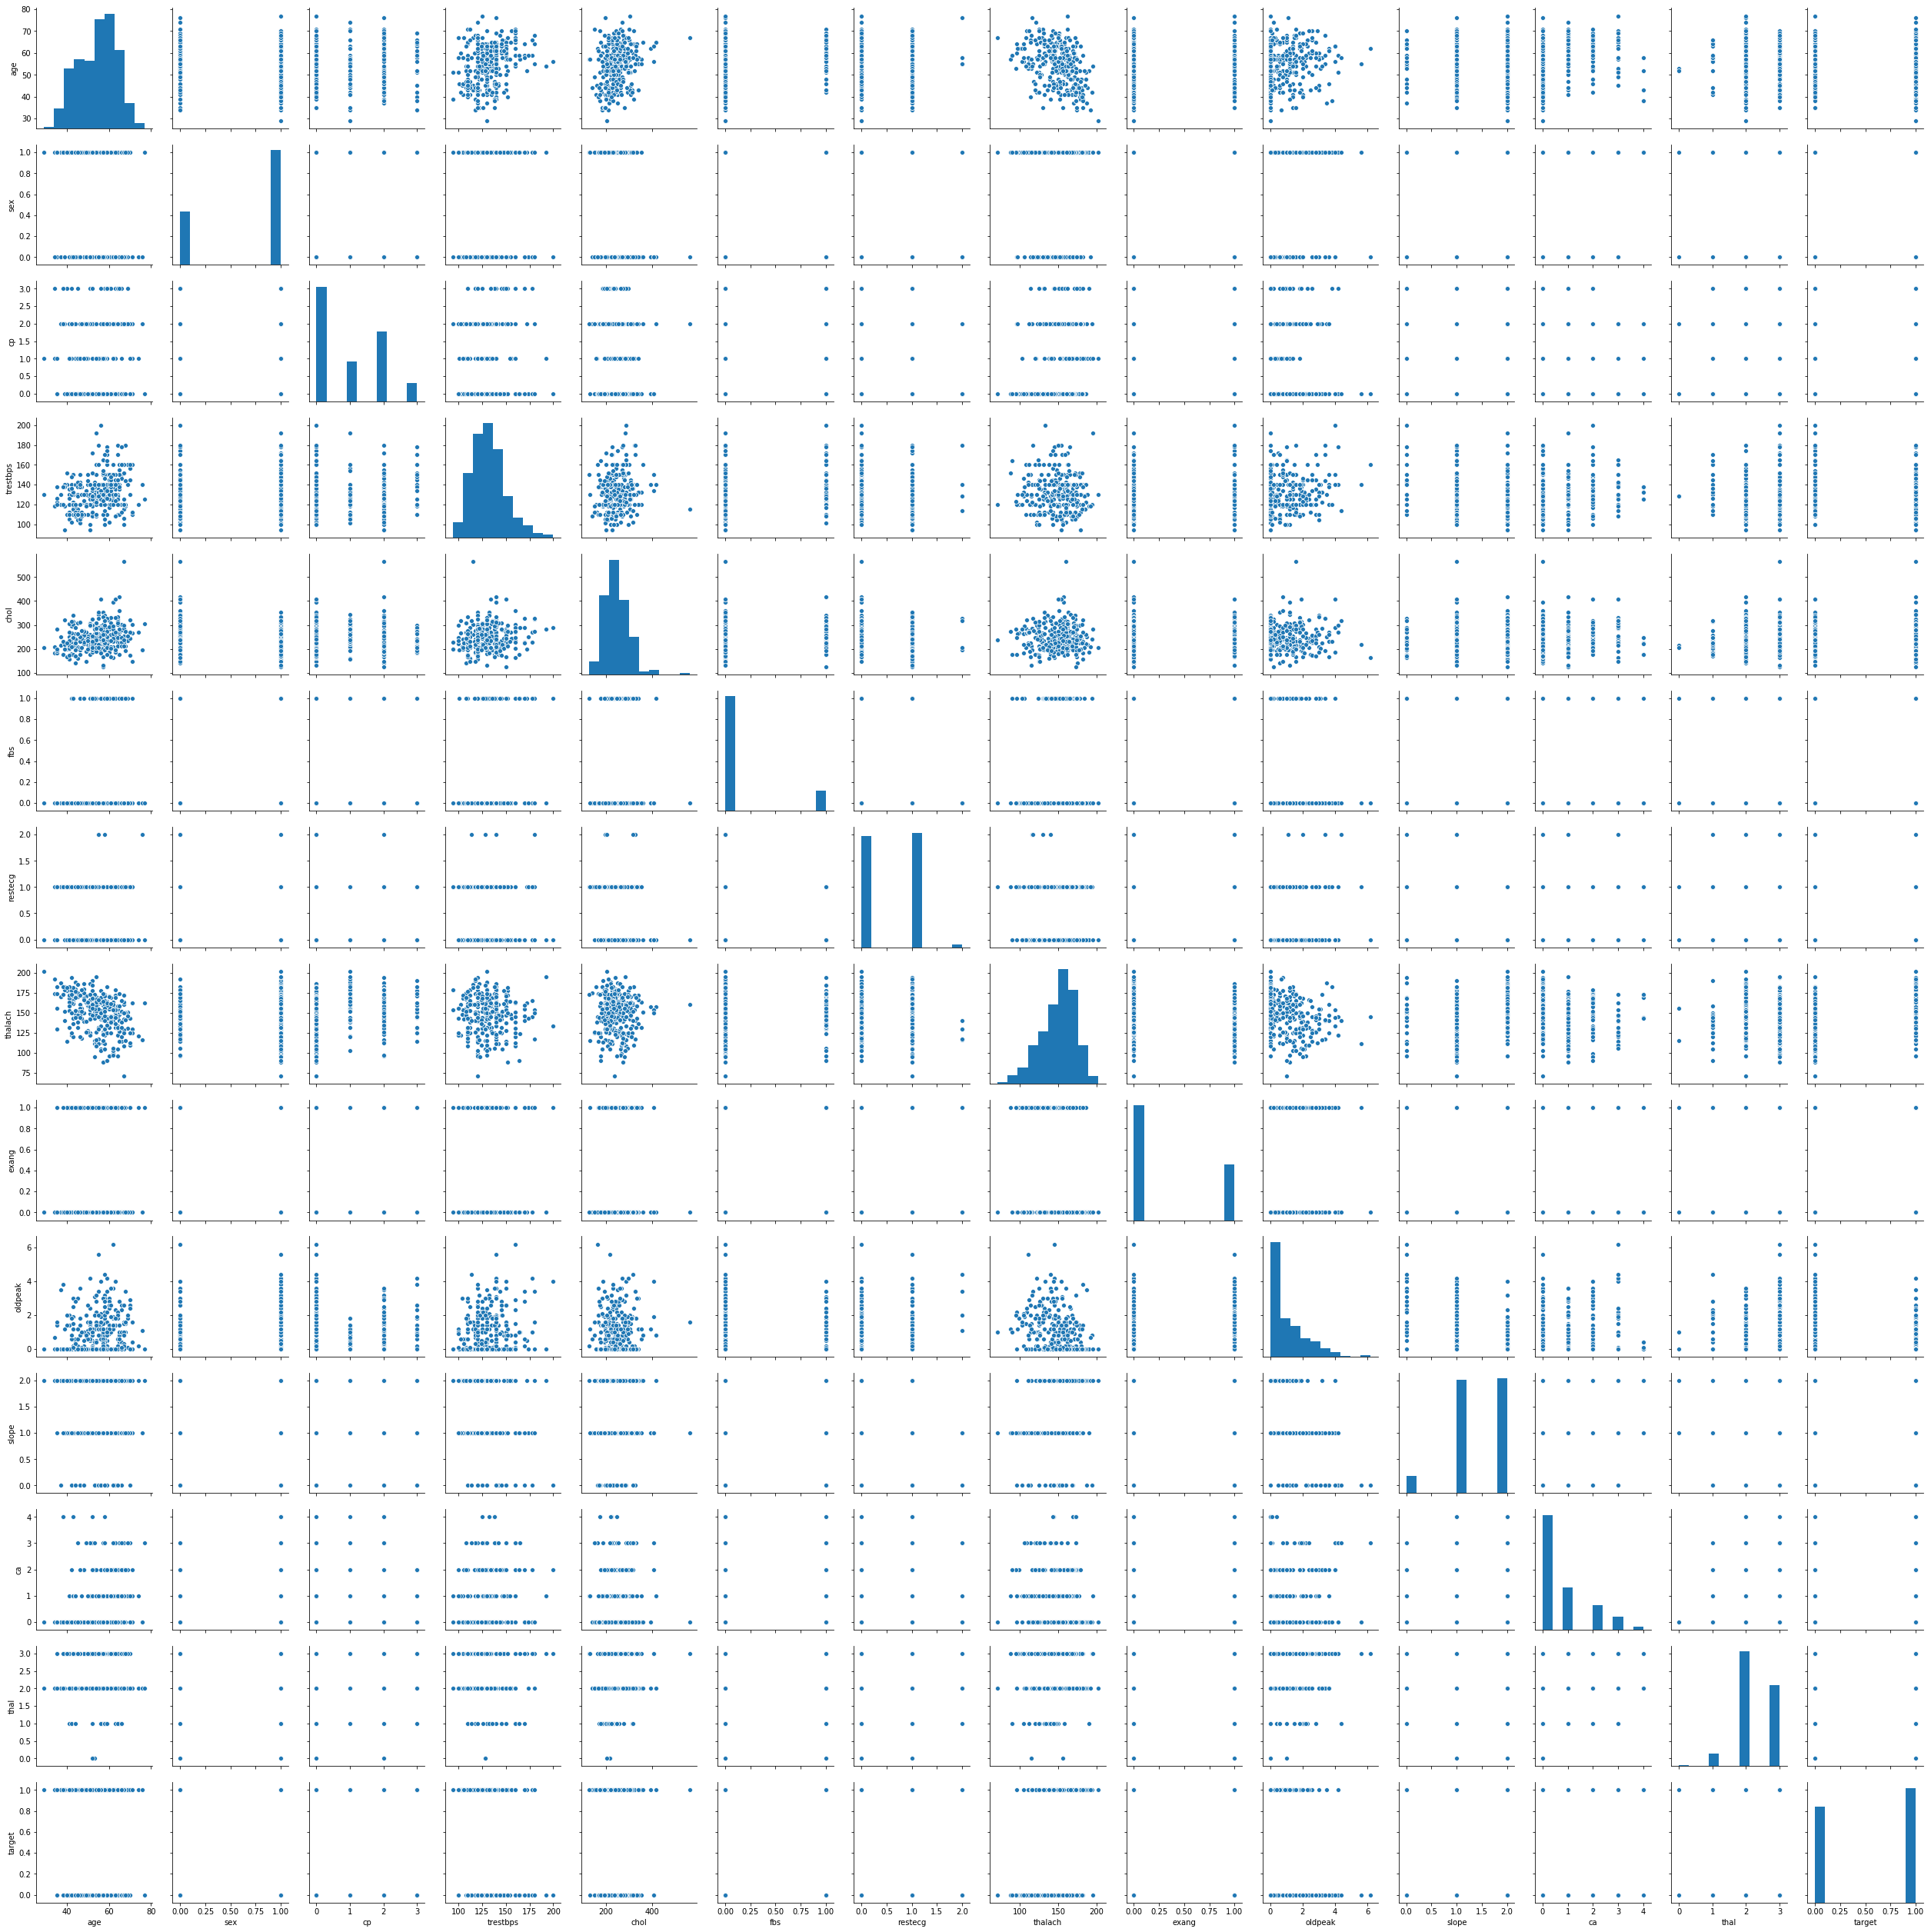

In [81]:
import seaborn as sns
sns.pairplot(uci)

### Apply to Animal Shelter Data
Using `.info()` and `.describe()` and `dtypes` what observations can we make about the data?

What are the breed value counts?

How about age counts for dogs?

In [83]:
animal_outcomes = pd.read_csv('https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD')

In [84]:
animal_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107099 entries, 0 to 107098
Data columns (total 12 columns):
Animal ID           107099 non-null object
Name                73433 non-null object
DateTime            107099 non-null object
MonthYear           107099 non-null object
Date of Birth       107099 non-null object
Outcome Type        107092 non-null object
Outcome Subtype     48798 non-null object
Animal Type         107099 non-null object
Sex upon Outcome    107095 non-null object
Age upon Outcome    107080 non-null object
Breed               107099 non-null object
Color               107099 non-null object
dtypes: object(12)
memory usage: 9.8+ MB


In [85]:
animal_outcomes.dtypes

Animal ID           object
Name                object
DateTime            object
MonthYear           object
Date of Birth       object
Outcome Type        object
Outcome Subtype     object
Animal Type         object
Sex upon Outcome    object
Age upon Outcome    object
Breed               object
Color               object
dtype: object

In [90]:
x = {'a': ['3', '4', None],
     'b': [1, 2, 3]
     }
pd.DataFrame(x)

,a,b
0,3,1
1,4,2
2,None,3


In [86]:
animal_outcomes.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A791820,Bandit,09/03/2019 08:00:00 AM,09/03/2019 08:00:00 AM,04/01/2011,Euthanasia,At Vet,Dog,NaN,NaN,Pit Bull/Labrador Retriever,Brown Brindle/White
1,A794029,Isla,09/03/2019 06:57:00 AM,09/03/2019 06:57:00 AM,05/03/2018,Adoption,Foster,Dog,Spayed Female,1 year,Australian Kelpie Mix,Black/White
2,A803458,Loki,09/02/2019 09:55:00 PM,09/02/2019 09:55:00 PM,04/01/2019,Euthanasia,Suffering,Dog,Intact Male,5 months,Pit Bull Mix,Tan
3,A803490,Zeus,09/02/2019 06:34:00 PM,09/02/2019 06:34:00 PM,09/02/2015,Return to Owner,NaN,Dog,Neutered Male,4 years,Treeing Tennesse Brindle,Brown Brindle
4,A803551,Penelope,09/02/2019 06:31:00 PM,09/02/2019 06:31:00 PM,09/02/2013,Return to Owner,NaN,Dog,Spayed Female,6 years,Dachshund/Australian Cattle Dog,White/Brown


What are the breed `value_counts`?
What's the top breed for adopted dogs?

How about outcome counts for dogs?




In [91]:
# What are the breed value_counts?
animal_outcomes.Breed.value_counts()

Domestic Shorthair Mix                           30156
Pit Bull Mix                                      8026
Labrador Retriever Mix                            6264
Chihuahua Shorthair Mix                           6013
Domestic Medium Hair Mix                          3025
German Shepherd Mix                               2716
Domestic Shorthair                                2551
Bat Mix                                           1741
Domestic Longhair Mix                             1492
Australian Cattle Dog Mix                         1366
Siamese Mix                                       1218
Bat                                               1027
Dachshund Mix                                      977
Boxer Mix                                          893
Border Collie Mix                                  867
Miniature Poodle Mix                               802
Catahoula Mix                                      620
Siberian Husky Mix                                 619
Australian

In [102]:
# What's the top breed for adopted dogs?
(animal_outcomes.loc[(animal_outcomes['Animal Type'] == 'Dog') &
                     (animal_outcomes['Outcome Type'] == 'Adoption')]
                .Breed
                .value_counts()[:5])

Labrador Retriever Mix       3181
Pit Bull Mix                 3119
Chihuahua Shorthair Mix      2879
German Shepherd Mix          1372
Australian Cattle Dog Mix     768
Name: Breed, dtype: int64

In [109]:
# How about outcome counts for dogs?
(animal_outcomes.loc[animal_outcomes['Animal Type'] == 'Dog', 'Outcome Type']
                .value_counts())

Adoption           28236
Return to Owner    17131
Transfer           13132
Euthanasia          1661
Rto-Adopt            373
Died                 219
Missing               27
Disposal              17
Name: Outcome Type, dtype: int64

In [120]:
# remove spaces in columns
animal_outcomes.columns = [x.replace(' ', '_').lower() for x in animal_outcomes.columns]

In [122]:
# query version
animal_outcomes.query('animal_type == "Dog"').outcome_type.value_counts()

Adoption           28236
Return to Owner    17131
Transfer           13132
Euthanasia          1661
Rto-Adopt            373
Died                 219
Missing               27
Disposal              17
Name: outcome_type, dtype: int64